In [1]:
# dependencies
import os
import cv2
import numpy as np
import pandas as pd
from deepface import DeepFace
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import StrMethodFormatter
from sklearn.model_selection import train_test_split

In [2]:
# Call VGGFace model
model_name = "Facenet"
model = DeepFace.build_model(model_name)

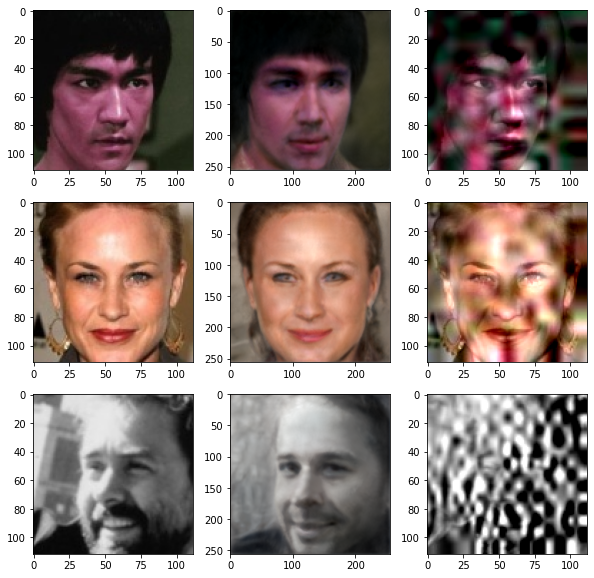

In [3]:
########################################################################
# VISUALLY COMPARE GENERATED FACES
########################################################################

####################################
# LOAD IMAGES
####################################
plain_face_path_1 = 'CASIA-WebFace/sub_images/490624/490624_2.jpg'
plain_face_1 = cv2.imread(plain_face_path_1)

encrypted_face_path_1 = 'r_w4o6_CASIA-WebFace/sub_images/490624/490624_2_j2k_r-W4-O6.png'
encrypted_face_1 = cv2.imread(encrypted_face_path_1)

generated_face_path_1 = 'Generated-Faces/sub_images_r_250000k_epochs/490624/490624_2_j2k_r-W4-O6.png'
generated_face_1 = cv2.imread(generated_face_path_1)



plain_face_path_2 = 'CASIA-WebFace/sub_images/490625/490625_17.jpg'
plain_face_2 = cv2.imread(plain_face_path_2)

encrypted_face_path_2 = 'r_w4o6_CASIA-WebFace/sub_images/490625/490625_17_j2k_r-W4-O6.png'
encrypted_face_2 = cv2.imread(encrypted_face_path_2)

generated_face_path_2 = 'Generated-Faces/sub_images_r_250000k_epochs/490625/490625_17_j2k_r-W4-O6.png'
generated_face_2 = cv2.imread(generated_face_path_2)



plain_face_path_3 = 'CASIA-WebFace/sub_images/490631/490631_982.jpg'
plain_face_3 = cv2.imread(plain_face_path_3)

encrypted_face_path_3 = 'r_w4o6_CASIA-WebFace/sub_images/490631/490631_982_j2k_r-W4-O6.png'
encrypted_face_3 = cv2.imread(encrypted_face_path_3)

generated_face_path_3 = 'Generated-Faces/sub_images_r_250000k_epochs/490631/490631_982_j2k_r-W4-O6.png'
generated_face_3 = cv2.imread(generated_face_path_3)




####################################
# PLOT IMAGES
####################################

images = [plain_face_1, generated_face_1, encrypted_face_1,
          plain_face_2, generated_face_2, encrypted_face_2,
          plain_face_3, generated_face_3, encrypted_face_3]

fig = plt.figure(figsize=(10, 10))

i = 1
for img in images:
    fig.add_subplot(3,3,i)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    i += 1
plt.show()

In [4]:
######################################################
# DATA LOADING
######################################################

# own class to store path separate for intra vs inter class comparison
class facepath: 
    def __init__(self, path, faceno): 
        self.path = path 
        self.faceno = faceno

###############################
# PLAIN FACES
###############################

# how many faces / folders should we use as database
n_faces = 10
n_max_images_per_face = 3

# Load all filenames into a list
path = 'CASIA-WebFace/images/train/' 
plain_faces = []
    
i = 0
for root, dirs, files in sorted(os.walk(path)):
    
    if i == n_faces+1:
        break
    j = 0
    for name in files:
        
        if j == n_max_images_per_face:
            break  
            
        plain_faces.append(facepath(str(root) + "/" + (str(name)), i))
        j += 1
        
    i += 1
        
print("loaded %d files from %d plain face(s)" % (len(plain_faces), n_faces))
print("Example: %s [%i]" % (plain_faces[0].path, plain_faces[0].faceno))
print("----------------------------------")

###############################
# ENCRYPTED FACES L
###############################

# Load all filenames into a list
path = 'l_w4o6_CASIA-WebFace/images/train/' 
encrypted_l_faces = []
    
i = 0
for root, dirs, files in sorted(os.walk(path)):
    
    if i == n_faces+1:
        break
    j = 0
    for name in files:
        
        if j == n_max_images_per_face:
            break  
            
        encrypted_l_faces.append(facepath(str(root) + "/" + (str(name)), i))
        j += 1
        
    i += 1
        
print("loaded %d files from %d encrypted layer progression order face(s)" % (len(encrypted_l_faces), n_faces))
print("Example: %s [%i]" % (encrypted_l_faces[0].path, encrypted_l_faces[0].faceno))
print("----------------------------------")

###############################
# ENCRYPTED FACES R
###############################

# Load all filenames into a list
path = 'r_w4o6_CASIA-WebFace/images/train/' 
encrypted_r_faces = []
    
i = 0
for root, dirs, files in sorted(os.walk(path)):
    
    if i == n_faces+1:
        break
    j = 0
    for name in files:
        
        if j == n_max_images_per_face:
            break  
            
        encrypted_r_faces.append(facepath(str(root) + "/" + (str(name)), i))
        j += 1
        
    i += 1
        
print("loaded %d files from %d encrypted resolution progression order face(s)" % (len(encrypted_r_faces), n_faces))
print("Example: %s [Face: %i]" % (encrypted_r_faces[0].path, encrypted_r_faces[0].faceno))
print("----------------------------------")

###############################
# RECONSTRUCTED FACES L
###############################

# Load all filenames into a list
path = 'Generated-Faces/sub_images_l_250000k_epochs/' 
reconstructed_faces_l = []
    
i = 0
for root, dirs, files in sorted(os.walk(path)):
    
    if i == n_faces+1:
        break
    j = 0
    for name in files:
        
        if j == n_max_images_per_face:
            break  
            
        reconstructed_faces_l.append(facepath(str(root) + "/" + (str(name)), i))
        j += 1
        
    i += 1
        
print("loaded %d files from %d AI reconstructed l face(s)" % (len(reconstructed_faces_l), n_faces))
print("Example: %s [Face: %i]" % (reconstructed_faces_l[0].path, reconstructed_faces_l[0].faceno))
print("----------------------------------")

###############################
# RECONSTRUCTED FACES R
###############################

# Load all filenames into a list
path = 'Generated-Faces/sub_images_r_250000k_epochs/' 
reconstructed_faces_r = []
    
i = 0
for root, dirs, files in sorted(os.walk(path)):
    
    if i == n_faces+1:
        break
    j = 0
    for name in files:
        
        if j == n_max_images_per_face:
            break  
            
        reconstructed_faces_r.append(facepath(str(root) + "/" + (str(name)), i))
        j += 1
        
    i += 1
        
print("loaded %d files from %d AI reconstructed r face(s)" % (len(reconstructed_faces_r), n_faces))
print("Example: %s [Face: %i]" % (reconstructed_faces_r[0].path, reconstructed_faces_r[0].faceno))
print("----------------------------------")


loaded 30 files from 10 plain face(s)
Example: CASIA-WebFace/images/train/490624/490624_11.jpg [1]
----------------------------------
loaded 30 files from 10 encrypted layer progression order face(s)
Example: l_w4o6_CASIA-WebFace/images/train/490624/490624_1_j2k_l-W4-O6.png [1]
----------------------------------
loaded 30 files from 10 encrypted resolution progression order face(s)
Example: r_w4o6_CASIA-WebFace/images/train/490624/490624_4_j2k_r-W4-O6.png [Face: 1]
----------------------------------
loaded 29 files from 10 AI reconstructed l face(s)
Example: Generated-Faces/sub_images_l_250000k_epochs/490624/490624_1_j2k_l-W4-O6.png [Face: 1]
----------------------------------
loaded 28 files from 10 AI reconstructed r face(s)
Example: Generated-Faces/sub_images_r_250000k_epochs/490624/490624_3_j2k_r-W4-O6.png [Face: 1]
----------------------------------


In [5]:
######################################################
# OWN CLASS TO STORE IMAGE PATHS AND CLASSES
######################################################

class facepath: 
    def __init__(self, path, faceno): 
        self.path = path 
        self.faceno = faceno

######################################################
# INTRA AND INTER CLASS - FACE COMPARISON
######################################################
        
def compare_faces(set_a, set_b, comparison):

    '''
    function: 
        compare two sets of faces with an face recognition algorithm

    input:
        set_a: set of faces containing objects of facepath
        set_b: set of faces containing objects of facepath

    output:
        avg_dist: average distance metric for face comparison

    '''
                  
    # average distance between images
    avg_dist = 0.0


    k = 0

    # iterate over all faces
    for face_a in set_a:

        for face_b in set_b:

            if "intra" in comparison:

                # only compare intra class, not inter
                if face_a.faceno == face_b.faceno:

                    # compare faces
                    result = DeepFace.verify(face_a.path,
                                             face_b.path,
                                             enforce_detection=False,
                                             model_name ="Facenet") 
                    k += 1

                    # compute average face distance
                    avg_dist =  avg_dist + result['distance']
                    
            elif "inter" in comparison:

                # only compare inter class not intra
                if face_a.faceno is not face_b.faceno:

                    # compare faces
                    result = DeepFace.verify(face_a.path,
                                             face_b.path,
                                             enforce_detection=False,
                                             model_name ="Facenet") 

                    k += 1

                    # compute average face distance
                    avg_dist =  avg_dist + result['distance']
    avg_dist = float(avg_dist / k)
                
    return avg_dist

In [6]:
######################################################
# COMPUTING INTER AND INTRA CLASS DISTANCES
######################################################

avg_pp_intra = compare_faces(plain_faces, plain_faces, "intra")
print("Avg. Intra-Class Distance PLAIN VS PLAIN: \t\t%.2f" % avg_pp_intra)

avg_elp_intra = compare_faces(encrypted_l_faces, plain_faces, "intra")
print("Avg. Intra-Class Distance LAYER-ENCRYPTED VS PLAIN: \t%.2f" % avg_elp_intra)

avg_erp_intra = compare_faces(encrypted_r_faces, plain_faces, "intra")
print("Avg. Intra-Class Distance RES_ENCRYPTED VS PLAIN: \t%.2f" % avg_erp_intra)

avg_egrp_intra = compare_faces(reconstructed_faces_r, plain_faces, "intra")
print("Avg. Intra-Class Distance AI-RECONSTRUCTED R VS PLAIN: \t%.2f" % avg_egrp_intra)

avg_eglp_intra = compare_faces(reconstructed_faces_l, plain_faces, "intra")
print("Avg. Intra-Class Distance AI-RECONSTRUCTED L VS PLAIN: \t%.2f" % avg_eglp_intra)

avg_pp_inter = compare_faces(plain_faces, plain_faces, "inter)")
print("Avg. Inter-Class Distance PLAIN VS PLAIN: \t\t%.2f" % avg_pp_inter)

avg_elp_inter = compare_faces(encrypted_l_faces, plain_faces, "inter")
print("Avg. Inter-Class Distance LAYER-ENCRYPTED VS PLAIN: \t%.2f" % avg_elp_inter)

avg_erp_inter = compare_faces(encrypted_r_faces, plain_faces, "inter")
print("Avg. Inter-Class Distance RES_ENCRYPTED VS PLAIN: \t%.2f" % avg_erp_inter)

avg_eglp_inter = compare_faces(reconstructed_faces_l, plain_faces, "inter")
print("Avg. Inter-Class Distance AI-RECONSTRUCTED L VS PLAIN: \t%.2f" % avg_eglp_inter)

avg_egrp_inter = compare_faces(reconstructed_faces_r, plain_faces, "inter")
print("Avg. Inter-Class Distance AI-RECONSTRUCTED R VS PLAIN: \t%.2f" % avg_egrp_inter)

Avg. Intra-Class Distance PLAIN VS PLAIN: 		0.33
Avg. Intra-Class Distance LAYER-ENCRYPTED VS PLAIN: 	0.86
Avg. Intra-Class Distance RES_ENCRYPTED VS PLAIN: 	0.80
Avg. Intra-Class Distance AI-RECONSTRUCTED R VS PLAIN: 	0.69
Avg. Intra-Class Distance AI-RECONSTRUCTED L VS PLAIN: 	0.73
Avg. Inter-Class Distance PLAIN VS PLAIN: 		0.91
Avg. Inter-Class Distance LAYER-ENCRYPTED VS PLAIN: 	0.87
Avg. Inter-Class Distance RES_ENCRYPTED VS PLAIN: 	0.89
Avg. Inter-Class Distance AI-RECONSTRUCTED L VS PLAIN: 	0.87
Avg. Inter-Class Distance AI-RECONSTRUCTED R VS PLAIN: 	0.88


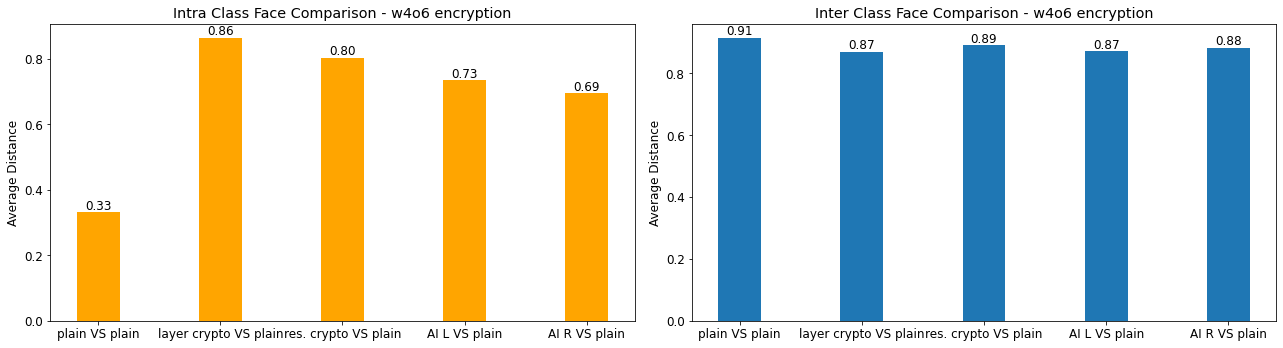

In [7]:
######################################################
# INTRA AND INTER CLASS - FACE COMPARISON - PLOT
######################################################

# Setting font of the Plot
font = {'weight' : 'normal',
        'size'   : 12
       }

matplotlib.rc('font', **font)


# Lables and Values
labels_intra = ['plain VS plain', 'layer crypto VS plain', 'res. crypto VS plain', 'AI L VS plain', 'AI R VS plain']
labels_inter = ['plain VS plain', 'layer crypto VS plain', 'res. crypto VS plain', 'AI L VS plain', 'AI R VS plain']
values_intra = [avg_pp_intra, avg_elp_intra, avg_erp_intra, avg_eglp_intra, avg_egrp_intra]
values_inter = [avg_pp_inter, avg_elp_inter, avg_erp_inter, avg_eglp_inter, avg_egrp_inter]


# Bar width and generating X values to place the bars
x = np.arange(len(labels_intra))  # the label locations
width = 0.35  # the width of the bars

# create suplots
fig, axs = plt.subplots(1,2, figsize=(18,5))
rects_intra = axs[0].bar(x - width/2, values_intra, width, align='edge', color='orange')

########################
# INTRA CLASS PLOT
########################

# Add some text for labels, tiSle and custom x-axis tick labels, etc.
axs[0].set_ylabel('Average Distance')
axs[0].set_title('Intra Class Face Comparison - w4o6 encryption')
axs[0].set_xticks(x)
axs[0].set_xticklabels(labels_intra)

# average distances
axs[0].bar_label(rects_intra, fmt='%.2f')

########################
# INTER CLASS PLOT
########################

rects_inter = axs[1].bar(x - width/2, values_inter, width, align='edge')

# Add some text for labels, tiSle and custom x-axis tick labels, etc.
axs[1].set_ylabel('Average Distance')
axs[1].set_title('Inter Class Face Comparison - w4o6 encryption')
axs[1].set_xticks(x)
axs[1].set_xticklabels(labels_inter)

# average distancesS
axs[1].bar_label(rects_inter, fmt='%.2f')



fig.tight_layout()

plt.show()